In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
singledata = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
singledata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mousenumber = singledata["Mouse ID"].value_counts()
mousenumber = len(mousenumber)
mousenumber

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = singledata.loc[singledata.duplicated( subset= ["Mouse ID","Timepoint"])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#checking number of duplicates with Mouse ID g989
duplicateID = singledata.loc[singledata["Mouse ID"]=="g989"]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#mouse data without Mouse ID g989
cleandata= singledata.loc[singledata["Mouse ID"]!="g989"]
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Get all the data for the duplicate mouse ID...Timepoint's are different
duplicate_data = singledata[singledata.duplicated(["Mouse ID"])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
nmiceclean = cleandata['Mouse ID'].value_counts()
len(nmiceclean)

248

In [8]:
#Clean data:  Tumor volume:  mean, median, variance, Std, SEM 

In [9]:
mean = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
median = singledata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
variance = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
std = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
sem = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Total number of measurements for each treatment regimen
summarytable = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std, 'Standard Error of Measurement': sem })
summarytable

,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.854632,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


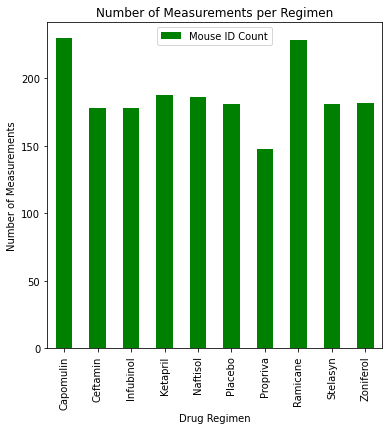

In [15]:
# bar plot using pandas
bar = cleandata.groupby(["Drug Regimen"]).count().reset_index()
twocat = bar[["Drug Regimen", "Mouse ID"]]
twocat= twocat.rename(columns = {"Mouse ID":"Mouse ID Count"})
twocat = twocat.set_index("Drug Regimen")
twocat.plot(kind ='bar', color = 'g', figsize = (6,6))
plt.title ('Number of Measurements per Regimen')
plt.ylabel('Number of Measurements')

plt.show()


In [16]:
#bar plot using pyplot as plt
numberdrug = cleandata.groupby("Drug Regimen")["Mouse ID"].count()
numberlist = numberdrug.tolist()
numberlist

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [17]:
#10 labels on x-axis
x_axis = np.arange(len(numberlist))

In [18]:
#10 drug names on x_axis
drugnames = summarytable.index.tolist()
drugnames

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

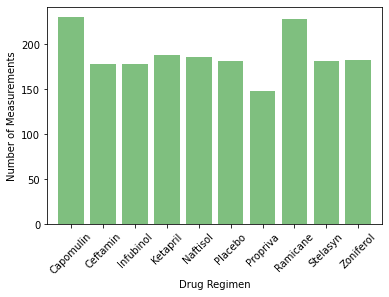

In [99]:
x_axis  = drugnames
plt.bar(x_axis, numberlist, color = 'g', align = 'center', alpha = 0.5)
plt.xlabel ('Drug Regimen')
plt.ylabel('Number of Measurements')

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drugnames)
plt.xticks(rotation = 45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [112]:
#pie plot of male vs female pandas
cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [113]:
#Dataframe of Male to Female 
sexid =pd.DataFrame(cleandata.groupby(['Sex']).count()).reset_index()
sexid

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [114]:
#Have to reset index to filter to two columns
sexid2 = sexid[["Sex", "Mouse ID"]].rename(columns= {"Mouse ID":"Mouse ID count"})
sexid2

,Sex,Mouse ID count
0,Female,922
1,Male,958


Text(0.5, 1.0, 'Male vs Female Mouse Count')

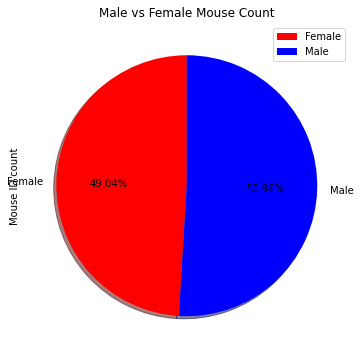

In [115]:
sexid2.plot(kind ='pie', y = "Mouse ID count", autopct='%1.2f%%', figsize = (6,6), startangle = 90, shadow= True, colors = ['red', 'blue'], labels = sexid2["Sex"])
plt.title('Male vs Female Mouse Count')

In [116]:
#pie plot of male vs female pyplot

In [117]:
labels = sexid2["Sex"]
sizes = sexid2["Mouse ID count"]
colors = ["red", "blue"]
explode = (0.1,0)

Text(0.5, 1.0, 'Male vs Female Mouse Count')

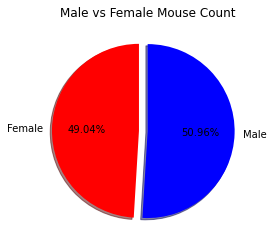

In [118]:
plt.pie(sizes, explode = explode, labels =labels, colors = colors, autopct ="%1.2f%%", shadow = True, startangle =90)
plt.title ('Male vs Female Mouse Count')

In [119]:
#Final tumor Volume for: Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the quartiles and IQR

cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [121]:
groups = cleandata.sort_values(["Drug Regimen", "Timepoint", "Mouse ID"])
groups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
290,b742,Capomulin,Male,7,21,0,45.000000,0
60,f966,Capomulin,Male,16,17,0,45.000000,0
235,g288,Capomulin,Male,3,19,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
...,...,...,...,...,...,...,...,...
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4
